## 🔬 Modelo de Evolução Artificial 
Usamos um **ambiente simulado** onde os indivíduos competem e evoluem ao longo das gerações. A aptidão (**fitness**) não é fixa, mas emerge das interações.

📌 **Características do modelo:**  
✔ Indivíduos representados por cadeias binárias (**genótipos**)  
✔ Seleção por torneio (competição local)  
✔ Reprodução com **crossover e mutação**  
✔ Substituição geracional (**os mais aptos sobrevivem**)  
✔ Registro da diversidade e evolução  

---

## 📜 Código da Simulação
Vamos estruturar o código em etapas:  

1️⃣ Definir **indivíduos e população**  
2️⃣ Criar operadores genéticos (**seleção, crossover, mutação**)  
3️⃣ Implementar a **dinâmica evolutiva**  
4️⃣ Rodar a simulação e **analisar resultados**  

---

### 📜 Parâmetros da Simulação

In [1]:
GENE_LENGTH = 16    # Número de bits por indivíduo
POP_SIZE = 20       # Tamanho da população
MUTATION_RATE = 0.8 # Probabilidade de ocorrencia de mutação
MTPB = 0.1          # Probabilidade de mutação por gene
CXPB = 0.5          # Probabilidade de crossover
GENERATIONS = 10    # Número de gerações

### 📌 1. Definição dos Indivíduos e População
Cada indivíduo é uma **cadeia binária**, e a população inicial é gerada aleatoriamente.  

In [2]:
import random

# Criando um indivíduo aleatório (genótipo como string binária)
def create_individual():
    return [random.randint(0, 1) for _ in range(GENE_LENGTH)]

# Criando a população inicial
def initialize_population(size):
    return [create_individual() for _ in range(size)]

### 📌 2. Função de Aptidão (Fitness)

Neste exemplo utilizamos a função OneMax $f:[0,1]^N\rightarrow\mathbb{R}$ definida por:
$$
f(x):=\sum_{i=1}^N x_i.
$$

In [3]:
def fitness(individual):
    return sum(int(gene) for gene in individual)  # Conta os '1's

### 📌 3. Operadores Genéticos

#### 📍 Seleção: Torneio
Selecionamos dois indivíduos e escolhemos o mais apto para reprodução.  

In [4]:
def tournament_selection(population, k=3):
    selected = random.sample(population, k)  # Escolhe k indivíduos aleatoriamente
    return max(selected, key=fitness)  # Retorna o mais apto

#### 📍 Crossover: Um ponto

In [5]:
def crossover(parent1, parent2):
    point = random.randint(1, GENE_LENGTH - 1)  # Escolhe um ponto de corte
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

#### 📍 Mutação: Bit Flip

In [6]:
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MTPB:
            individual[i] = type(individual[i])(not individual[i])            
    return individual

### 📌 4. Algoritmo Evolutivo

In [7]:
def evolve():
    population = initialize_population(POP_SIZE)
    best_fitness_over_time = []

    for generation in range(GENERATIONS):
        new_population = []

        # Gera nova população
        while len(new_population) < POP_SIZE:
            # Torneio para seleção de pais
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            # Probabilidade de ocorrencia de cruzamento
            if random.random() < CXPB:
                # Gera dois filhos do cruzamento
                child1, child2 = crossover(parent1, parent2)
                
                if random.random() < MUTATION_RATE:
                    # Aplica mutação 
                    child1 = mutate(child1)
                    child2 = mutate(child2)
                    
                # Inclui à nova população
                new_population.extend([child1, child2])

        # Atualiza população e coleta dados
        population = sorted(new_population, key=fitness, reverse=True)[:POP_SIZE]
        best_fitness = fitness(population[0])
        best_fitness_over_time.append(best_fitness)

        print(f"Geração {generation + 1}: Melhor fitness = {best_fitness}")

    return best_fitness_over_time

### 📌 5. Executando e Analisando Resultados

Geração 1: Melhor fitness = 13
Geração 2: Melhor fitness = 13
Geração 3: Melhor fitness = 14
Geração 4: Melhor fitness = 14
Geração 5: Melhor fitness = 15
Geração 6: Melhor fitness = 15
Geração 7: Melhor fitness = 15
Geração 8: Melhor fitness = 15
Geração 9: Melhor fitness = 16
Geração 10: Melhor fitness = 16


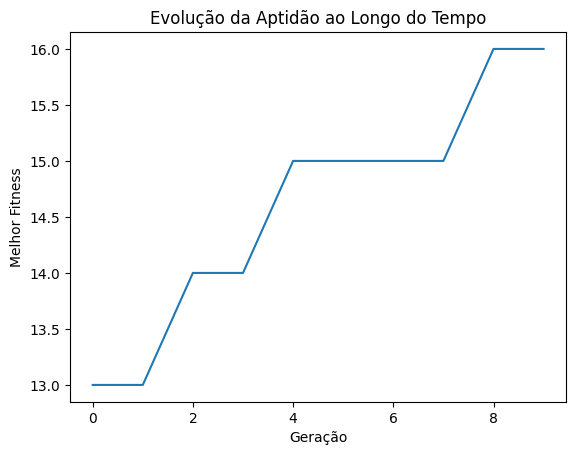

In [8]:
import matplotlib.pyplot as plt

# Executa a simulação
best_fitness = evolve()

# Plota evolução do fitness
plt.plot(best_fitness)
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.title("Evolução da Aptidão ao Longo do Tempo")
plt.show()

## 📊 Resultados
📌 No início, os indivíduos terão aptidões baixas, mas ao longo das gerações veremos um aumento no número de "1s" nos genótipos.  
📌 O gráfico mostrará a convergência para um genótipo mais adaptado.  